C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\1749305975.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_country.values, y=revenue_per_country.index, palette='viridis')


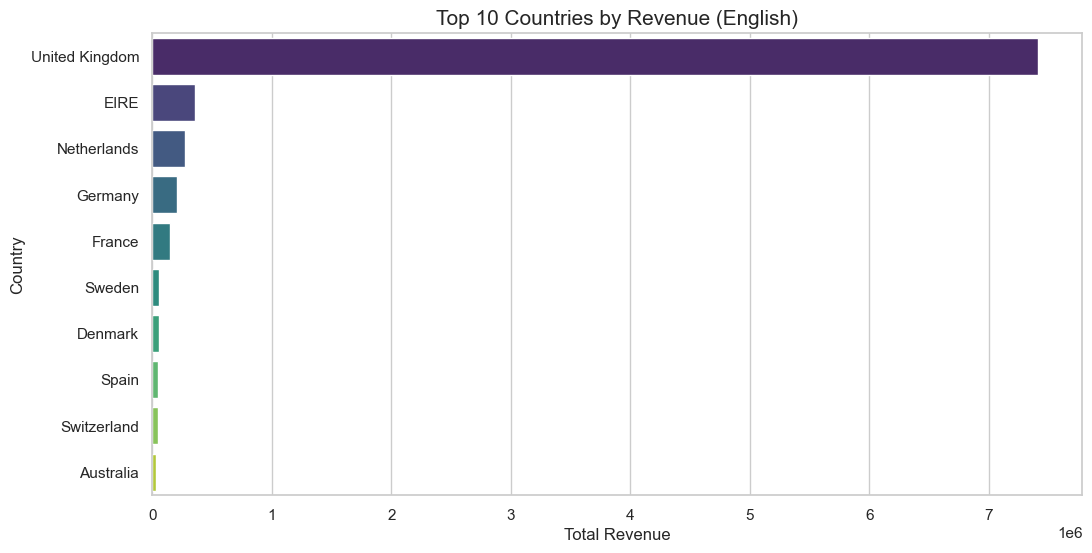

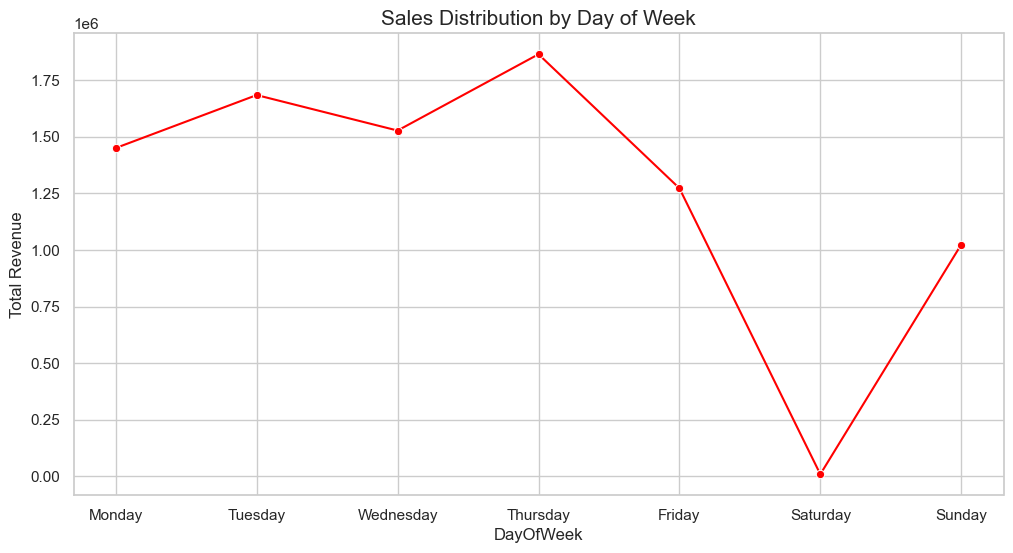

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Professional ko'rinish uchun sozlamalar
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Tozalangan ma'lumotni yuklaymiz
df = pd.read_csv('../data/processed_retail.csv', parse_dates=['InvoiceDate'])

# A. Davlatlar bo'yicha jami daromad (Top 10 Countries by Revenue)
revenue_per_country = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=revenue_per_country.values, y=revenue_per_country.index, palette='viridis')
plt.title('Top 10 Countries by Revenue (English)', fontsize=15)
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

# B. Haftalik savdo dinamikasi (Sales Trend)
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df.groupby('DayOfWeek')['TotalAmount'].sum().reindex(day_order)

plt.figure()
sns.lineplot(x=sales_by_day.index, y=sales_by_day.values, marker='o', color='red')
plt.title('Sales Distribution by Day of Week', fontsize=15)
plt.ylabel('Total Revenue')
plt.show()

C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\2681640615.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')


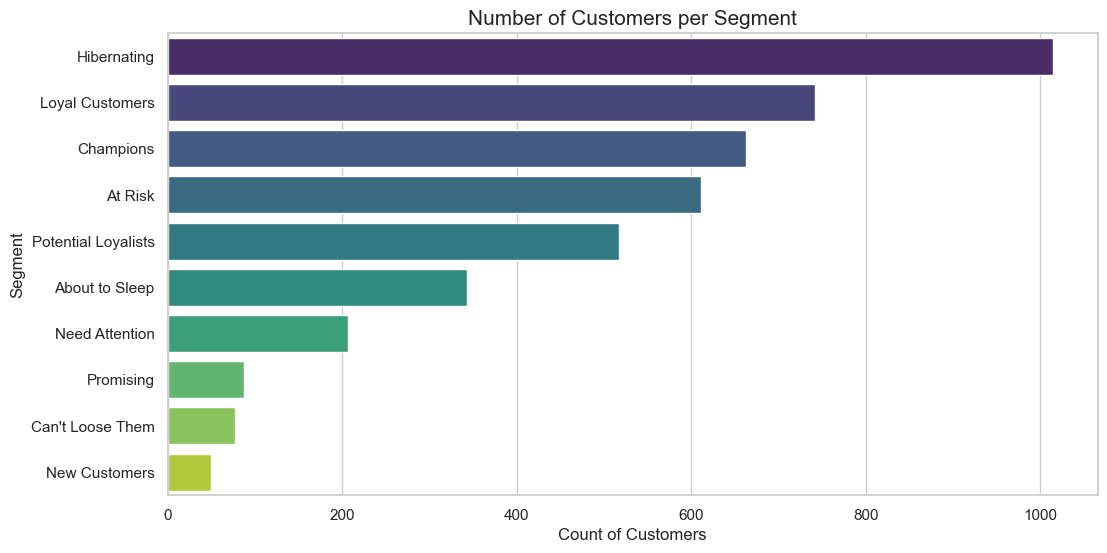

C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\2681640615.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_stats.index, y=segment_stats['Monetary'], palette='magma')


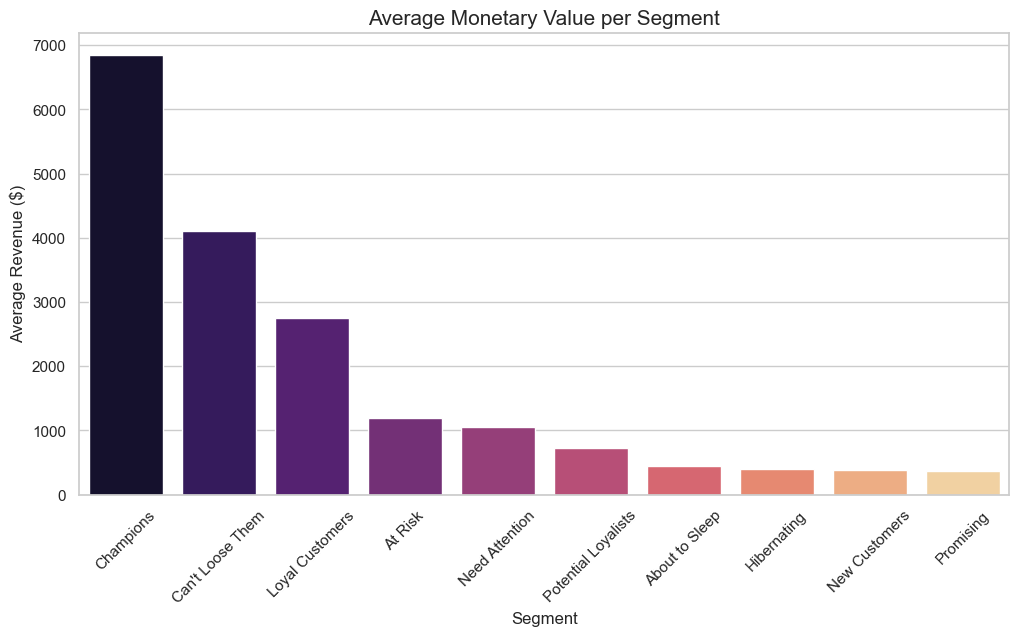

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the new segmented data
rfm = pd.read_csv('../data/customer_segments.csv')

# 2. Customer Segments Distribution (Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Number of Customers per Segment', fontsize=15)
plt.xlabel('Count of Customers')
plt.ylabel('Segment')
plt.show()

# 3. Average Monetary Value by Segment (Who brings more money?)
segment_stats = rfm.groupby('Segment').agg({'Monetary': 'mean'}).sort_values(by='Monetary', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=segment_stats.index, y=segment_stats['Monetary'], palette='magma')
plt.title('Average Monetary Value per Segment', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Average Revenue ($)')
plt.show()

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualize the Clusters using Frequency and Monetary
plt.figure(figsize=(10, 7))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='bright', s=100, alpha=0.7)
plt.title('Customer Segmentation: ML Clusters (Frequency vs Monetary)', fontsize=15)
plt.yscale('log') # Log scale helps to see the clusters more clearly
plt.xscale('log')
plt.grid(True)
plt.legend(title='ML Cluster')
plt.show()

# 2. Boxplot for Recency to see the difference clearly
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='bright')
plt.title('Recency Distribution by Cluster', fontsize=15)
plt.show()

ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x700 with 0 Axes>

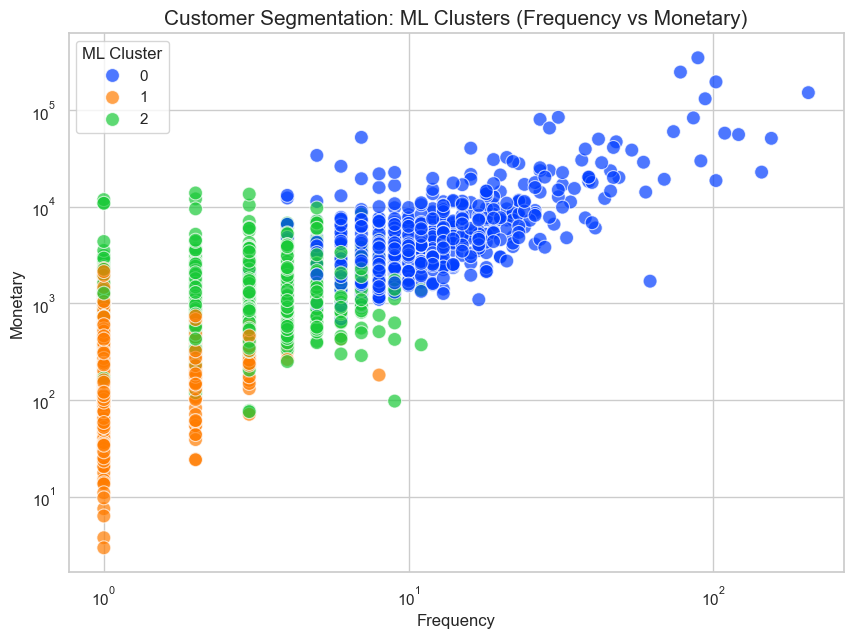

C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\414762594.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='bright')


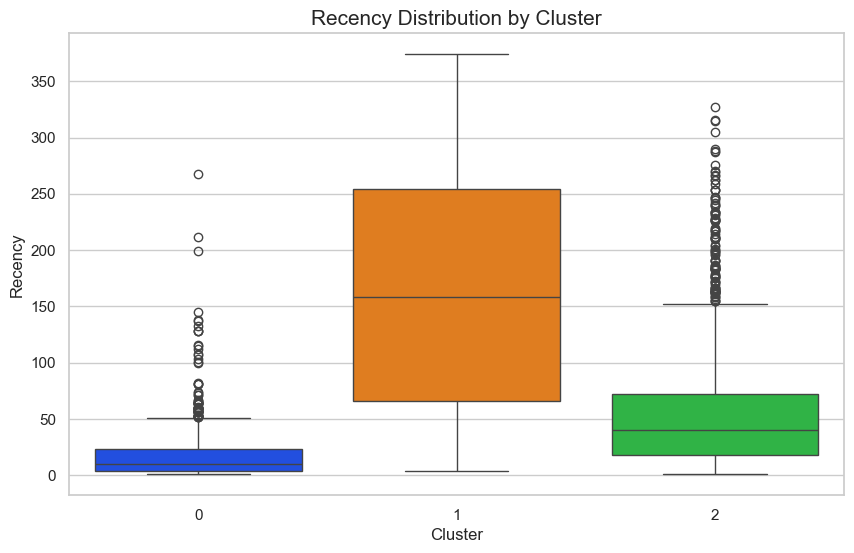

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. MUHIM: Suxrob saqlagan yangi faylni yuklaymiz (ichida Cluster ustuni bor)
rfm = pd.read_csv('../data/rfm_with_clusters.csv')

# 2. Grafikni qaytadan chizamiz
plt.figure(figsize=(10, 7))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='bright', s=100, alpha=0.7)
plt.title('Customer Segmentation: ML Clusters (Frequency vs Monetary)', fontsize=15)
plt.yscale('log') 
plt.xscale('log')
plt.grid(True)
plt.legend(title='ML Cluster')
plt.show()

# 3. Recency uchun Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='bright')
plt.title('Recency Distribution by Cluster', fontsize=15)
plt.show()

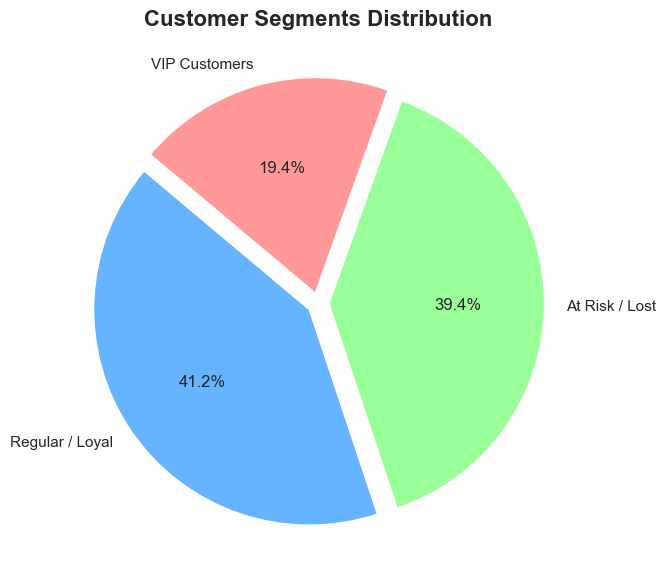

C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\3383314240.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values, palette='viridis')


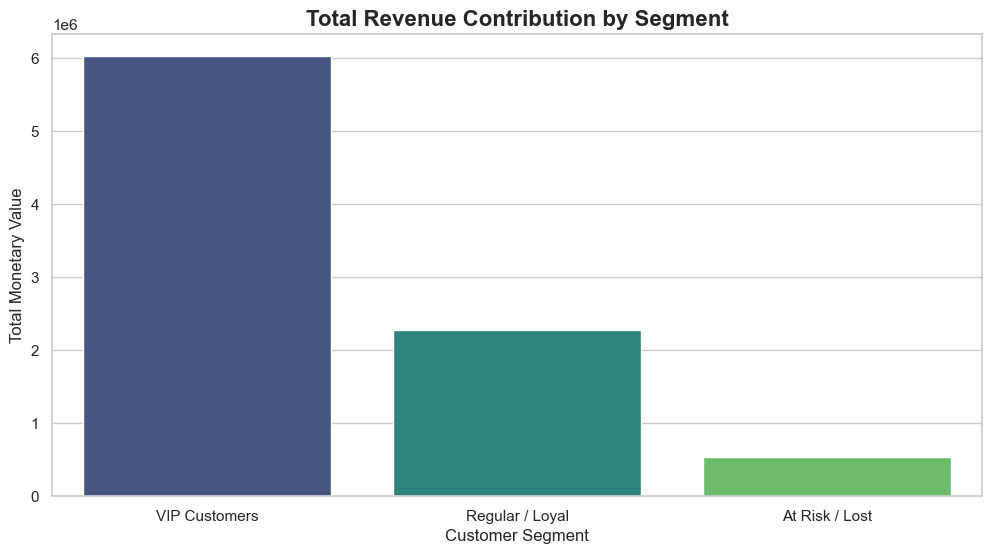

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Yuklangan ma'lumotni o'qiymiz
df_final = pd.read_csv('../data/final_customer_insights.csv')

# 2. Mijozlar soni bo'yicha taqsimot (Pie Chart)
plt.figure(figsize=(10, 7))
segment_counts = df_final['Cluster_Name'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff','#99ff99','#ff9999'], startangle=140, explode=(0.05, 0.05, 0.05))
plt.title('Customer Segments Distribution', fontsize=16, fontweight='bold')
plt.show()

# 3. Har bir guruhning biznesga keltirgan jami daromadi (Total Revenue by Segment)
plt.figure(figsize=(12, 6))
revenue_by_segment = df_final.groupby('Cluster_Name')['Monetary'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values, palette='viridis')
plt.title('Total Revenue Contribution by Segment', fontsize=16, fontweight='bold')
plt.ylabel('Total Monetary Value')
plt.xlabel('Customer Segment')
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def export_all_visuals(data_path, output_dir='../visuals/'):
    """
    Creates the visuals directory if it doesn't exist and 
    automatically saves all charts as PNG files.
    """
    # 1. Create directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    # 2. Load the final data
    try:
        df = pd.read_csv(data_path)
    except FileNotFoundError:
        print(f"Error: {data_path} file not found. Please check the data folder.")
        return

    # Set visualization style
    sns.set_theme(style="whitegrid")
    
    # --- CHART 1: ML Clusters (Frequency vs Monetary) ---
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='Cluster', palette='bright', s=100, alpha=0.7)
    plt.yscale('log')
    plt.xscale('log')
    plt.title('Customer Segmentation: ML Clusters (Frequency vs Monetary)', fontsize=14)
    # Automatic Save
    plt.savefig(os.path.join(output_dir, '01_cluster_scatter.png'), dpi=300)
    plt.close()
    print("✅ Saved: 01_cluster_scatter.png")

    # --- CHART 2: Customer Segments Pie Chart ---
    plt.figure(figsize=(10, 8))
    segment_counts = df['Cluster_Name'].value_counts()
    plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('pastel'), startangle=140, explode=[0.05]*len(segment_counts))
    plt.title('Customer Segments Distribution', fontsize=14)
    # Automatic Save
    plt.savefig(os.path.join(output_dir, '02_segments_pie.png'), dpi=300)
    plt.close()
    print("✅ Saved: 02_segments_pie.png")

    # --- CHART 3: Total Revenue by Segment (Bar Chart) ---
    plt.figure(figsize=(12, 6))
    revenue_by_segment = df.groupby('Cluster_Name')['Monetary'].sum().sort_values(ascending=False)
    sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values, palette='viridis')
    plt.title('Total Revenue Contribution by Segment', fontsize=14)
    plt.ylabel('Total Monetary Value')
    # Automatic Save
    plt.savefig(os.path.join(output_dir, '03_revenue_contribution.png'), dpi=300)
    plt.close()
    print("✅ Saved: 03_revenue_contribution.png")

    # --- CHART 4: Recency Boxplot ---
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster_Name', y='Recency', data=df, palette='bright')
    plt.title('Recency Distribution by Segment', fontsize=14)
    # Automatic Save
    plt.savefig(os.path.join(output_dir, '04_recency_boxplot.png'), dpi=300)
    plt.close()
    print("✅ Saved: 04_recency_boxplot.png")

    print(f"\n🚀 SUCCESS: All {len(os.listdir(output_dir))} visuals are exported to the '{output_dir}' folder!")

if __name__ == "__main__":
    # Point to the final dataset from Week 5
    input_file = '../data/final_customer_insights.csv'
    export_all_visuals(input_file)

✅ Saved: 01_cluster_scatter.png
✅ Saved: 02_segments_pie.png


C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\4145962635.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values, palette='viridis')


✅ Saved: 03_revenue_contribution.png


C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\4145962635.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Name', y='Recency', data=df, palette='bright')


✅ Saved: 04_recency_boxplot.png

🚀 SUCCESS: All 4 visuals are exported to the '../visuals/' folder!


In [7]:
# --- CHART 5: Frequency vs Recency Scatter (Activity Pattern) ---
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='Recency', y='Frequency', hue='Cluster_Name', palette='bright', s=80)
    plt.title('Activity Pattern: How often vs How recently', fontsize=14)
    plt.savefig(os.path.join(output_dir, '05_frequency_vs_recency.png'), dpi=300)
    plt.close()
    print("✅ Saved: 05_frequency_vs_recency.png")

    # --- CHART 6: Monetary Value Distribution (Violin Plot) ---
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Cluster_Name', y='Monetary', data=df, palette='pastel')
    plt.yscale('log')
    plt.title('Monetary Value Density by Segment', fontsize=14)
    plt.savefig(os.path.join(output_dir, '06_monetary_density.png'), dpi=300)
    plt.close()
    print("✅ Saved: 06_monetary_density.png")

    # --- CHART 7: Average RFM Scores (Radar/Spider Chart alternative) ---
    plt.figure(figsize=(10, 6))
    avg_rfm = df.groupby('Cluster_Name')[['Recency', 'Frequency', 'Monetary']].mean()
    # Normalize for better visualization in bar chart
    avg_rfm_norm = (avg_rfm - avg_rfm.min()) / (avg_rfm.max() - avg_rfm.min())
    avg_rfm_norm.plot(kind='bar', figsize=(12,6), colormap='viridis')
    plt.title('Comparison of Normalized RFM Metrics across Segments', fontsize=14)
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.savefig(os.path.join(output_dir, '07_segment_comparison.png'), dpi=300)
    plt.close()
    print("✅ Saved: 07_segment_comparison.png")

    # --- CHART 8: Frequency Distribution (Histogram) ---
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Frequency'], bins=50, kde=True, color='purple')
    plt.xlim(0, df['Frequency'].quantile(0.95)) # Focus on the bulk of customers
    plt.title('Overall Purchase Frequency Distribution', fontsize=14)
    plt.savefig(os.path.join(output_dir, '08_frequency_histogram.png'), dpi=300)
    plt.close()
    print("✅ Saved: 08_frequency_histogram.png")

IndentationError: unexpected indent (4068754187.py, line 2)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# 1. Create visuals directory if it doesn't exist
output_dir = '../visuals/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"✅ Created directory: {output_dir}")

# 2. Load the final data 
# Ensure this path is correct based on your file location
df = pd.read_csv('../data/final_customer_insights.csv')

# Set aesthetic parameters
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 100

print("🎨 Generating 8 professional charts... Please wait.")

# --- CHART 1: ML Clusters (Frequency vs Monetary) ---
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='Cluster', palette='bright', s=100, alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.title('01. Customer Segmentation: ML Clusters', fontsize=14)
plt.savefig(os.path.join(output_dir, '01_cluster_scatter.png'), bbox_inches='tight')
plt.close()

# --- CHART 2: Customer Segments Pie Chart ---
plt.figure(figsize=(10, 8))
segment_counts = df['Cluster_Name'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), startangle=140, explode=[0.05]*len(segment_counts))
plt.title('02. Customer Segments Distribution', fontsize=14)
plt.savefig(os.path.join(output_dir, '02_segments_pie.png'), bbox_inches='tight')
plt.close()

# --- CHART 3: Total Revenue by Segment ---
plt.figure(figsize=(12, 6))
revenue_by_segment = df.groupby('Cluster_Name')['Monetary'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values, palette='viridis')
plt.title('03. Total Revenue Contribution by Segment', fontsize=14)
plt.savefig(os.path.join(output_dir, '03_revenue_contribution.png'), bbox_inches='tight')
plt.close()

# --- CHART 4: Recency Boxplot ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Name', y='Recency', data=df, palette='bright')
plt.title('04. Recency Distribution by Segment', fontsize=14)
plt.savefig(os.path.join(output_dir, '04_recency_boxplot.png'), bbox_inches='tight')
plt.close()

# --- CHART 5: Frequency vs Recency (Activity Pattern) ---
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Recency', y='Frequency', hue='Cluster_Name', palette='bright', s=80)
plt.title('05. Activity Pattern: Frequency vs Recency', fontsize=14)
plt.savefig(os.path.join(output_dir, '05_frequency_vs_recency.png'), bbox_inches='tight')
plt.close()

# --- CHART 6: Monetary Value Distribution (Violin Plot) ---
plt.figure(figsize=(12, 6))
sns.violinplot(x='Cluster_Name', y='Monetary', data=df, palette='pastel')
plt.yscale('log')
plt.title('06. Monetary Value Density by Segment', fontsize=14)
plt.savefig(os.path.join(output_dir, '06_monetary_density.png'), bbox_inches='tight')
plt.close()

# --- CHART 7: Normalized RFM Comparison ---
plt.figure(figsize=(12, 6))
avg_rfm = df.groupby('Cluster_Name')[['Recency', 'Frequency', 'Monetary']].mean()
avg_rfm_norm = (avg_rfm - avg_rfm.min()) / (avg_rfm.max() - avg_rfm.min())
avg_rfm_norm.plot(kind='bar', figsize=(12,6), colormap='coolwarm')
plt.title('07. Normalized RFM Metrics Comparison', fontsize=14)
plt.xticks(rotation=0)
plt.savefig(os.path.join(output_dir, '07_segment_comparison.png'), bbox_inches='tight')
plt.close()

# --- CHART 8: Frequency Histogram ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Frequency'], bins=50, kde=True, color='purple')
plt.xlim(0, df['Frequency'].quantile(0.95)) 
plt.title('08. Overall Purchase Frequency Distribution', fontsize=14)
plt.savefig(os.path.join(output_dir, '08_frequency_histogram.png'), bbox_inches='tight')
plt.close()

print(f"🚀 DONE! All 8 charts are saved in: {os.path.abspath(output_dir)}")

🎨 Generating 8 professional charts... Please wait.


C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\659736540.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_segment.index, y=revenue_by_segment.values, palette='viridis')
C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\659736540.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Name', y='Recency', data=df, palette='bright')
C:\Users\TEMUR SHIRINBOYEV\AppData\Local\Temp\ipykernel_12032\659736540.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster_Name', y='Monetary', dat

🚀 DONE! All 8 charts are saved in: d:\Ajou\2-kurs\2-semester\EST team\DA_and_ML\visuals


<Figure size 1200x600 with 0 Axes>